In [1]:
import numpy as np
import pandas as pd

In [8]:
thedata = pd.read_csv('bank-additional-full.csv',delimiter=";")

In [9]:
thedata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
dataX = thedata.drop(["y","duration"],axis =1)
dataY = thedata["y"]

In [13]:
dataX = pd.get_dummies(dataX, columns=dataX.select_dtypes("object").columns)
dataX.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_s

In [15]:
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate, StratifiedKFold
clf = ExtraTreesClassifier(n_estimators = 100 )
StratifiedKFold =StratifiedKFold(n_splits=10)
scores = cross_validate(clf,  dataX, dataY, cv=StratifiedKFold)
print('Average accuracy:',np.mean(scores['test_score']),"(+/-)",2*np.std(scores['test_score']))

Average accuracy: 0.518905583419732 (+/-) 0.5061419221331451


In [16]:
clf.fit(dataX,dataY)
y_prediction = clf.predict(dataX)
print(y_prediction)
confusion_matrix = confusion_matrix(dataY, y_prediction)
confusion_matrix

['no' 'no' 'no' ... 'no' 'yes' 'no']


array([[36539,     9],
       [  234,  4406]], dtype=int64)

[ 0  1  7  2  8 61  4 38 36  9 22 28  6 31  5 56 23 55 18 57 58 39 41 54
 30 21 10  3 27 50 13 60 16 43 25 14 49 42 33 32 34 52 26 15 59 17 11 19
 48 12 44 47 51 53 45 20 37 40 46 24 29 35]
Feature ranking:
1. age (0.156072)
2. campaign (0.104196)
3. euribor3m (0.099206)
4. pdays (0.042673)
5. nr.employed (0.037674)
6. poutcome_success (0.031140)
7. emp.var.rate (0.024948)
8. housing_yes (0.021052)
9. housing_no (0.020820)
10. job_admin. (0.017197)
11. marital_married (0.016580)
12. education_high.school (0.016442)
13. cons.conf.idx (0.015907)
14. education_university.degree (0.015772)
15. cons.price.idx (0.015589)
16. day_of_week_thu (0.015013)
17. marital_single (0.014740)
18. day_of_week_mon (0.014678)
19. job_technician (0.014374)
20. day_of_week_tue (0.014281)
21. day_of_week_wed (0.014075)
22. loan_no (0.014024)
23. loan_yes (0.013606)
24. day_of_week_fri (0.013565)
25. education_professional.course (0.011727)
26. marital_divorced (0.011171)
27. job_blue-collar (0.011122)
28. pre

(0, 0.16958524822026272)

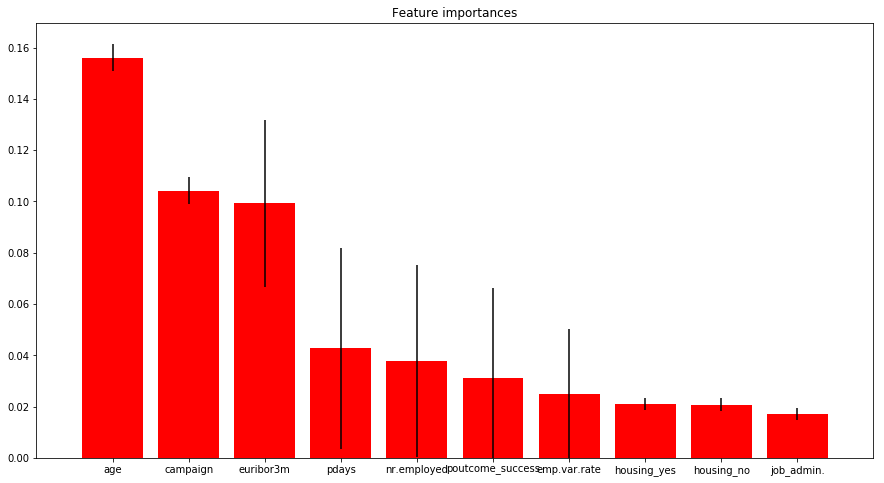

In [19]:
import matplotlib.pyplot as plt
n_features = len(dataX.columns)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
print(indices)

print("Feature ranking:")

for f in range(n_features):
    print("%d. %s (%f)" % (f + 1, dataX.columns[indices[f]],  importances[indices[f]]))

fig = plt.figure()
plt.title("Feature importances")  
num_feat_to_plot = 10
plt.bar(range(num_feat_to_plot), importances[indices[:num_feat_to_plot]], color="r", yerr=std[indices[:num_feat_to_plot]], align="center")
plt.xticks(range(num_feat_to_plot), np.array(dataX.columns)[indices[:num_feat_to_plot]])
plt.xlim([-1, num_feat_to_plot])
fig.set_size_inches(15,8)
axes = plt.gca()
axes.set_ylim([0,None])